# Raport z projektu

> Autorzy: Mateusz Kwiatkowski, Szymon Ochnio, Oskar Biwejnis (zespół 10A)

## Wprowadzenie

Celem naszego projektu było wykonanie klasyfikacji rodzajów szkła w zbiorze danych *Glass Classification*, przygotowanym przez *UCI*, z wykorzystaniem poznanych podczas zajęć narzędzi.

## 1. Wstępne przygotowanie danych do badań

Przed przystąpieniem do przeprowadzania badań nad zbiorem danych musimy zaimportować pakiety niezbędne do podejmowania dalszych działań.

Pakiet `numpy` i `pandas` posiadają struktury umożliwiające składowanie danych w tabelach wraz z szybkim dostępem oraz udostępniają funkcje pozwalające na eksplorację zbioru danych.

In [1]:
import numpy as np
import pandas as pd

Pakiety `seaborn` i `matplotlib` udostępniają funkcje pozwalające na wizualizację danych na wykresach.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Pakiet `sklearn` posiada modele pozwalające na przygotowanie zbioru uczącego oraz przeprowadzenie procesu klasyfikacji.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE

Tymczasowo wyłączymy również ostrzeżenia z kategorii `FutureWarning`, gdyż pojawiają się one w przypadku wykorzystania klasyfikatora KNN, na co nie mamy wpływu bo błąd wynika z wewnętrznej implementacji

In [4]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

W celu lepszej wizualizacji danych, zmienimy format wyświetlania danych zmiennoprzecinkowych na maksymalnie dwa miejsca po przecinku.

In [5]:
pd.options.display.float_format = "{:.2f}".format

Przed rozpoczęciem analizy musimy załadować zbiór danych z dostępnego pliku źródłowego.

In [6]:
data = pd.read_csv('glass.csv')

data.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


>W ramce danych znajduje się 9 atrybutów opisowych: <br>
&emsp;RI - Refractive Index (pol. wspołczynnik załamania),<br>
&emsp;oraz procentowy udział masy danego pierwiastka w tlenku: <br>
&emsp;Na - sodu, <br>
&emsp;Mg - magnezu, <br>
&emsp;Al - glinu, <br>
&emsp;Si - krzemu,<br>
&emsp;K - potasu,<br>
&emsp;Ca - wapnia,<br>
&emsp;Ba - baru,<br>
&emsp;Fe - żelaza,<br> <br>
W ostatniej, 10. kolumnie (atrybut decyzyjny), zawarta jest informacja o typie szkła:<br>
&emsp;1 - building_windows_float_processed<br>
&emsp;2 - building_windows_non_float_processed<br>
&emsp;3 - vehicle_windows_float_processed<br>
&emsp;4 - vehicle_windows_non_float_processed (brak w tej ramce danych)<br>
&emsp;5 - containers<br>
&emsp;6 - tableware<br>
&emsp;7 - headlamps<br>


## 2. Analiza eksploracyjna danych

Przed przystąpieniem do klasyfikacji musimy przeprowadzić analizę eksploracyjną, aby poznać przetwarzane dane i przygotować je do dalszej obróbki.

In [7]:
data_dim = data.shape

print(f"Liczba wierszy: {data_dim[0]}")
print(f"Liczba kolumn: {data_dim[1]}")

Liczba wierszy: 214
Liczba kolumn: 10


Przetwarzany zbiór danych ma 10 kolumn i 214 wierszy, co oznacza, że w zbiorze jest 214 obiektów o 10 różnych atrybutach.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


W zbiorze jest 9 kolumn przechowujących dane zmiennoprzecinkowe oraz 1 kolumna przechowująca dane całkowite. Kolumna `Type` jest atrybutem decyzyjnym - określa, jakiego typu (kategorii) jest dany obiekt. Pozostałe kolumny to atrybuty opisujące.

Jako że `Type` to atrybut kategoryczny, należy zmienić jego `dtype` w ramce z typu całkowitego na typ kategoryczny.

In [9]:
data = data.astype({'Type': 'category'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


Sprawdzimy teraz, czy w zbiorze znajdują się jakiekolwiek braki - jeżeli tak, to obiekty zawierające braki będą musiały zostać usunięte.

In [10]:
print(f"Braki w danych: {data.isnull().sum().sum()}")

Braki w danych: 0


W zbiorze nie ma żadnych braków, co oznacza, że możemy przystąpić do dalszych działań bez potrzeby usuwania jakichkolwiek obiektów.

In [11]:
print(f"Liczba kategorii obiektów: {data['Type'].unique().shape[0]}\n")

for kl in list(data["Type"].unique()):
    print(f"Liczba obiektów w klasie '{kl}': {data[data.Type == kl].shape[0]}")

Liczba kategorii obiektów: 6

Liczba obiektów w klasie '1': 70
Liczba obiektów w klasie '2': 76
Liczba obiektów w klasie '3': 17
Liczba obiektów w klasie '5': 13
Liczba obiektów w klasie '6': 9
Liczba obiektów w klasie '7': 29


W zbiorze danych mamy łącznie 6 różnych (4. typ szkła nie występuje) kategorii obiektów opisanych w kolumnie `Type`. Liczba obiektów w poszczególnych klasach została przedstawiona powyżej.
Możemy dostrzec przewagę typów szkła 1. i 2., których razem jest więcej niż wszystkich pozostałych. Najmniej liczną, lecz występującą klasą jest klasa 6., natomiast klasa 4. nie znajduje się w tym zbiorze.

Teraz sprawdzimy, jakie miary opisują poszczególne atrybuty, w celu określenia dalszych działań.

In [12]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06
std,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00
25%,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00
75%,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51


Zauważamy, że dominującym pierwiastkiem jest krzem, występujący zawsze w conajmniej 69.81%. Drugim najistotniejszym jest sód - zawsze powyżej 10.73 %. Żelazo stanowi średnio najmniejszą część masy tlenku - jedynie 0.06%. Największym zmiennością (odchyleniem standardowym) charaktryzują się magnez i wapń.


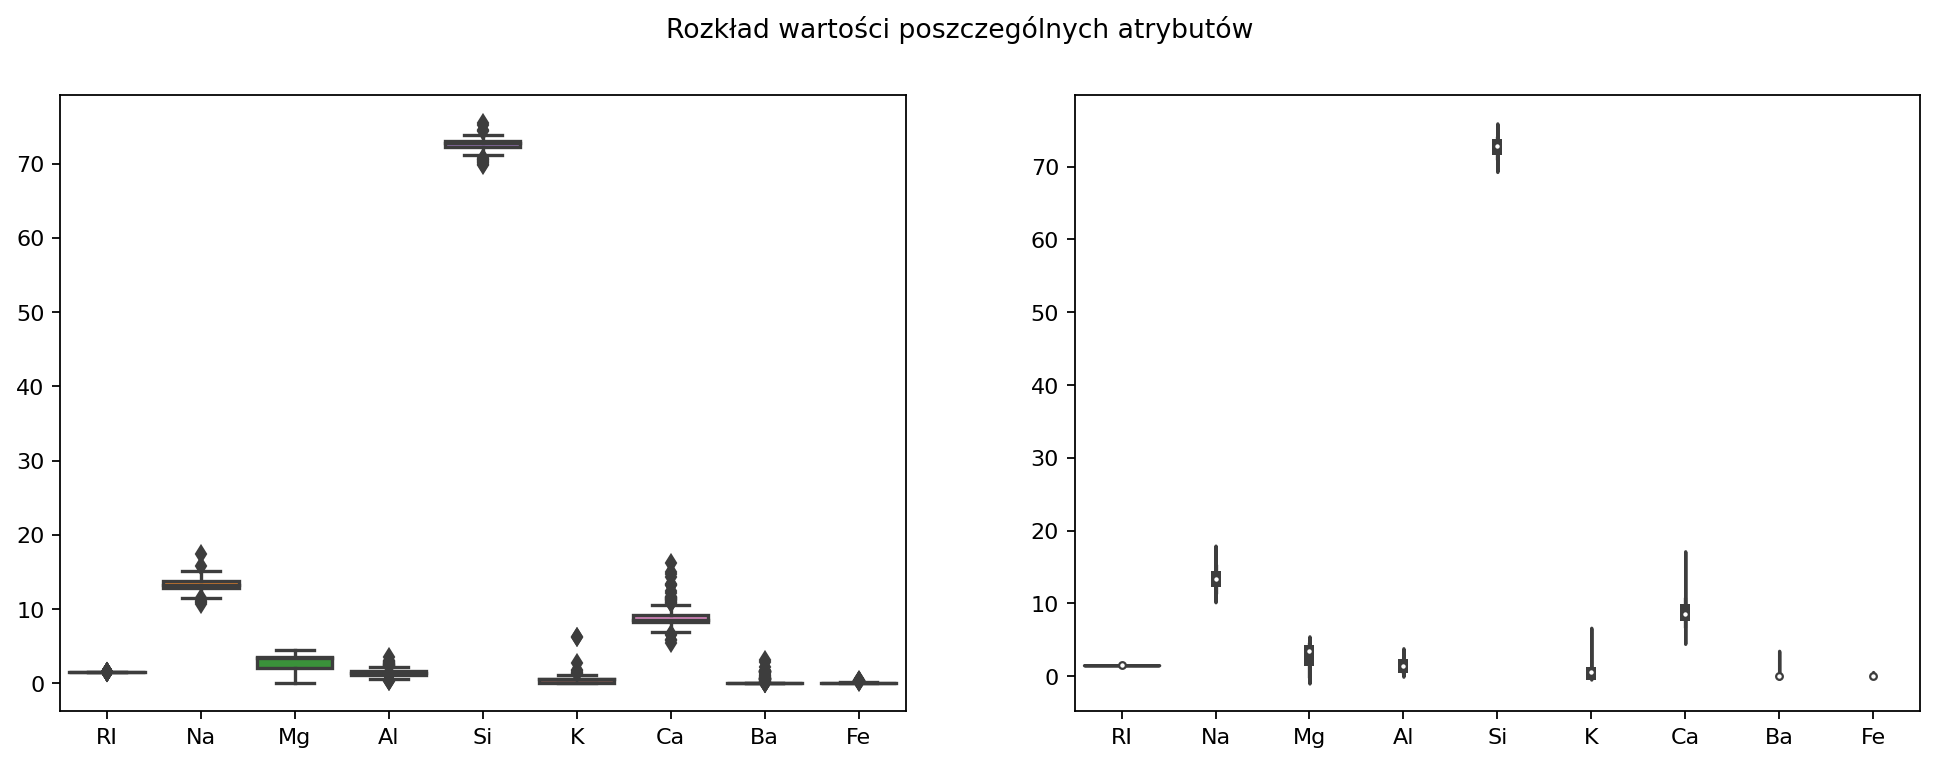

In [13]:
plt.figure(figsize=(15,5), dpi=160)
plt.suptitle("Rozkład wartości poszczególnych atrybutów")
plt.subplot(1,2,1)
sns.boxplot(data=data)
plt.subplot(1,2,2)
sns.violinplot(data=data)

Powyższe wykresy przedstawiają, jak wygląda rozkład i rozrzut poszczególnych atrybutów ze zbioru danych.

Jak można zauważyć, niektóre atrybuty - zwłaszcza `Si`, `Na` i `Ca` - znacznie odstają swoimi zakresami wartości od pozostałych atrybutów. Może się to okazać problematyczne przy klasyfikacji, ponieważ przy klasyfikatorach działających na odległościach, będą one dominowały nad pozostałymi atrybutami.

Aby temu zapobiec, dane zostaną poddane procesowi standaryzacji.

In [14]:
scaler = StandardScaler()

data.iloc[:,:-1] = pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]), columns=data.columns[:-1])

data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.87,0.28,1.25,-0.69,-1.13,-0.67,-0.15,-0.35,-0.59,1
1,-0.25,0.59,0.64,-0.17,0.10,-0.03,-0.79,-0.35,-0.59,1
2,-0.72,0.15,0.60,0.19,0.44,-0.16,-0.83,-0.35,-0.59,1
3,-0.23,-0.24,0.70,-0.31,-0.05,0.11,-0.52,-0.35,-0.59,1
4,-0.31,-0.17,0.65,-0.41,0.56,0.08,-0.62,-0.35,-0.59,1


In [15]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.38,-3.29,-1.87,-2.32,-3.68,-0.76,-2.48,-0.35,-0.59
25%,-0.61,-0.61,-0.40,-0.51,-0.48,-0.58,-0.50,-0.35,-0.59
50%,-0.23,-0.13,0.55,-0.17,0.18,0.09,-0.25,-0.35,-0.59
75%,0.26,0.51,0.64,0.37,0.56,0.17,0.15,-0.35,0.44
max,5.14,4.88,1.25,4.13,3.57,8.78,5.09,6.00,4.66


Po standaryzacji średnie wartości wszystkich atrybutów wynoszą 0, a odchylenie standardowe 1.

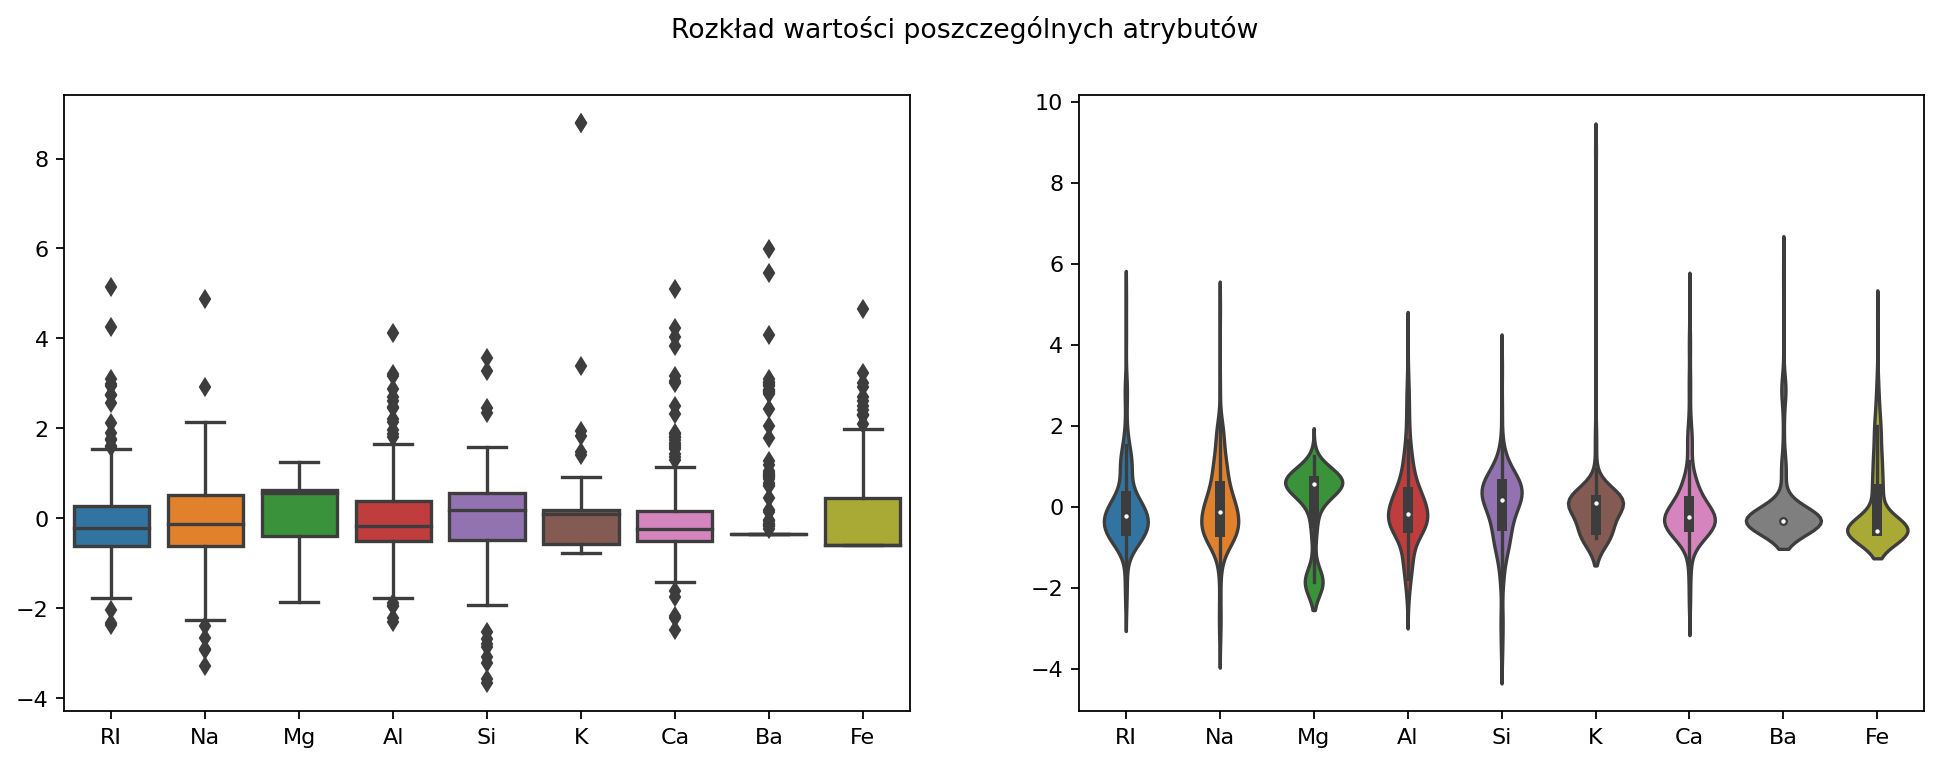

In [16]:
plt.figure(figsize=(15,5), dpi=160)
plt.suptitle("Rozkład wartości poszczególnych atrybutów")
plt.subplot(1,2,1)
sns.boxplot(data=data)
plt.subplot(1,2,2)
sns.violinplot(data=data)

Po procesie standaryzacji atrybuty mieszczą się w podobnych zakresach wartości, co przedstawiają powyższe wykresy.

Na wykresie pudełkowym widać przy każdym atrybucie wiele punktów odstających, co oznacza, że w zauważalnej liczbie obiektów  wartości atrybutów odstają od średniej. Może to wpłynąć negatywnie na proces klasyfikacji, gdyż mogą zacierać się wówczas granice między poszczególnymi klasami.

Przed dokładną analizą poszczególnych atrybutów należy jeszcze sprawdzić, jak wygląda rozkład liczby obiektów w poszczególnych klasach.

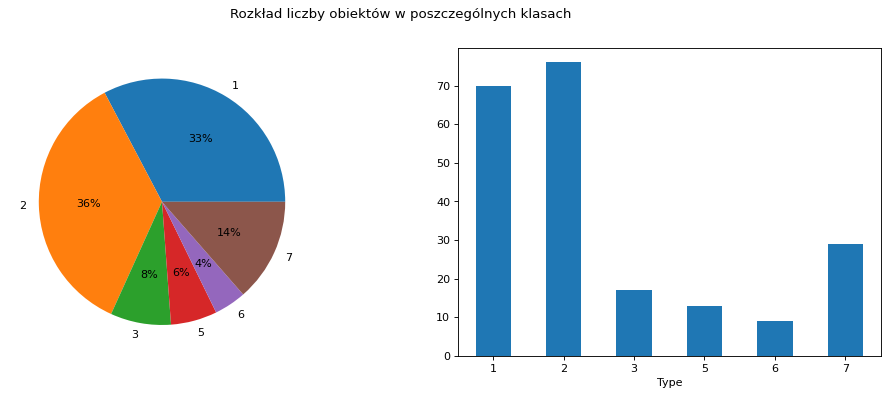

In [17]:
type_distribution = data.groupby("Type")["Type"].count()

plt.figure(figsize=(15,5), dpi=80)
plt.suptitle("Rozkład liczby obiektów w poszczególnych klasach")
plt.subplot(1,2,1)
plt.pie(type_distribution, autopct='%.0f%%', labels=type_distribution.index)
plt.subplot(1,2,2)
type_distribution.plot(kind="bar", rot=0)


Jak widać, rozkład liczby obiektów w poszczególnych klasach jest nieproporcjonalny, przez co dwie pierwsze klasy znacząco przeważają nad pozostałymi klasami. Jest to problematyczne przy przeprowadzaniu klasyfikacji, ponieważ przypisanie obiektu do klasy o małej liczbie próbek w zbiorze uczącym jest utrudnione.

Dlatego też, musimy w zbiorze danych wykonać *oversampling*, czyli wygenerować w zbiorach z klas mniejszościowych podobne obiekty. Wykorzystamy do tego metodę *SMOTE*.

In [18]:
sm_data, sm_type = SMOTE().fit_resample(data.iloc[:,:-1], data.iloc[:,-1])

data = sm_data.join(sm_type)

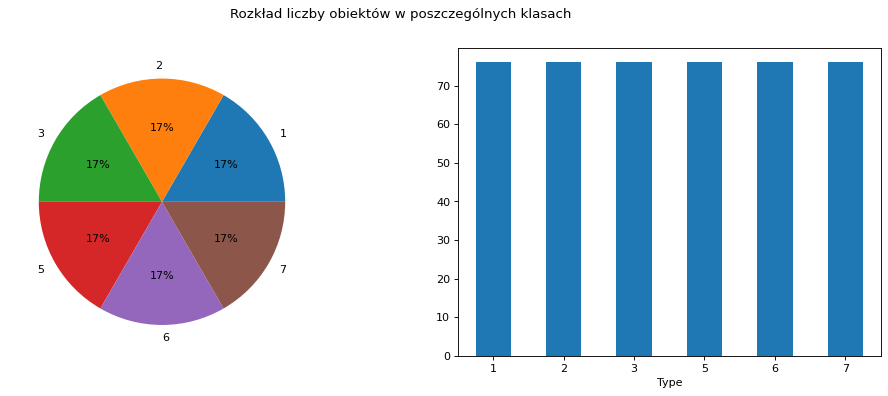

In [19]:
type_distribution = data.groupby("Type")["Type"].count()

plt.figure(figsize=(15,5), dpi=80)
plt.suptitle("Rozkład liczby obiektów w poszczególnych klasach")
plt.subplot(1,2,1)
plt.pie(type_distribution, autopct='%.0f%%', labels=type_distribution.index)
plt.subplot(1,2,2)
type_distribution.plot(kind="bar", rot=0)

Po wykonaniu oversamplingu liczba obiektów w każdej klasie jest równa, co poprawi jakość klasyfikowania.

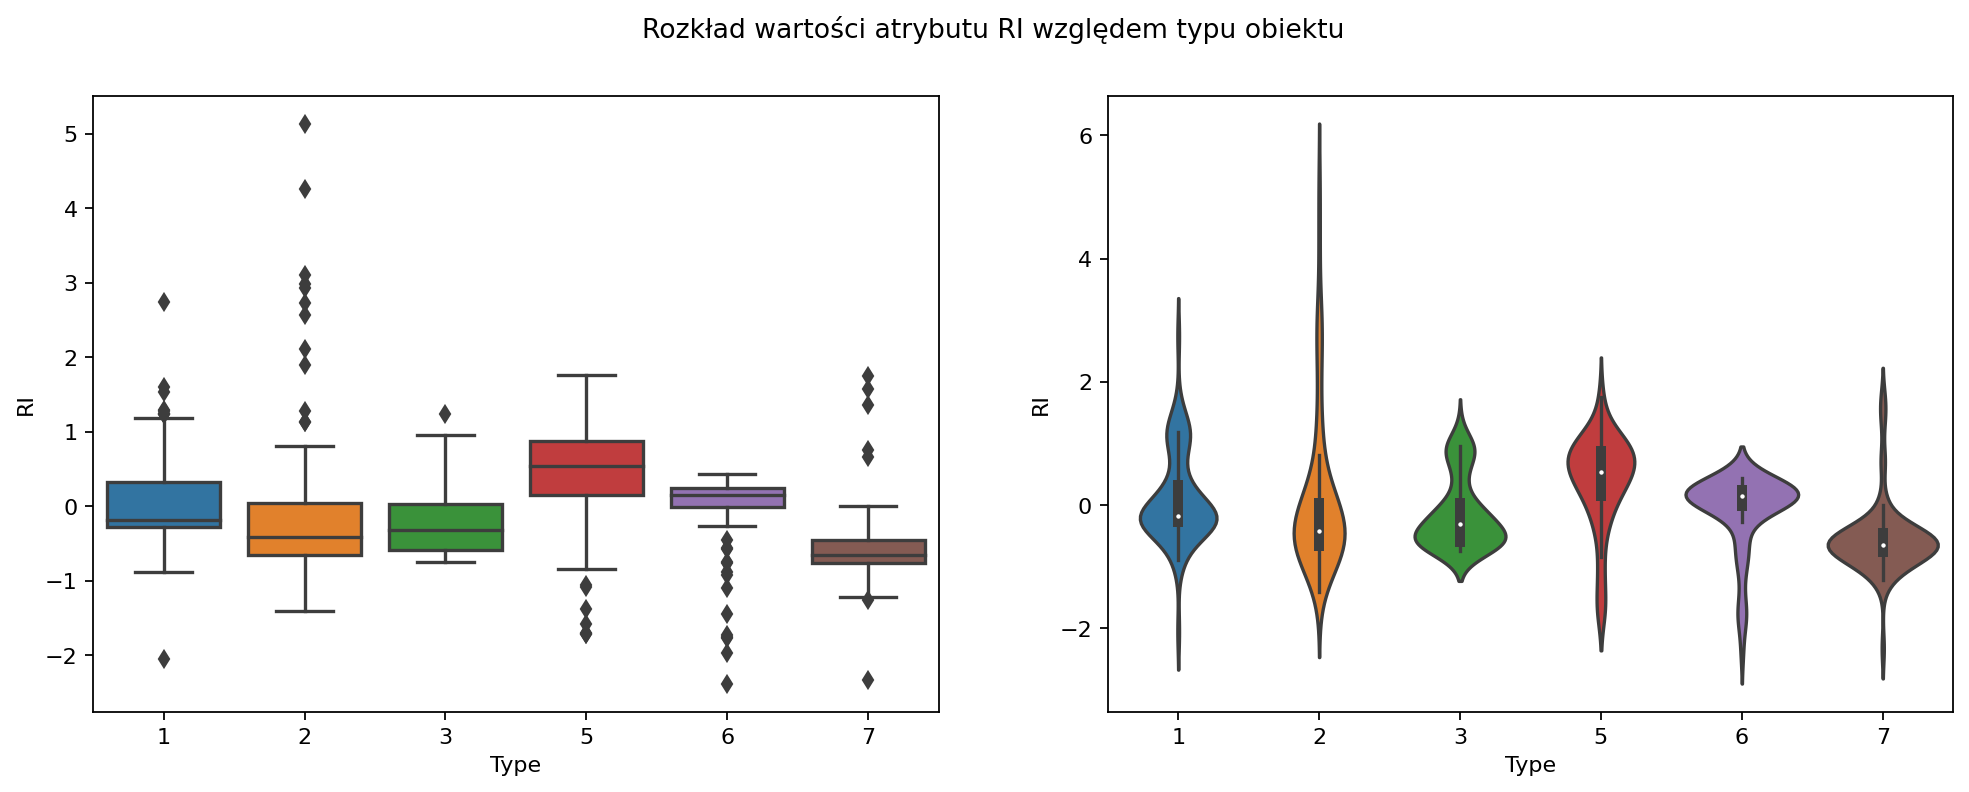

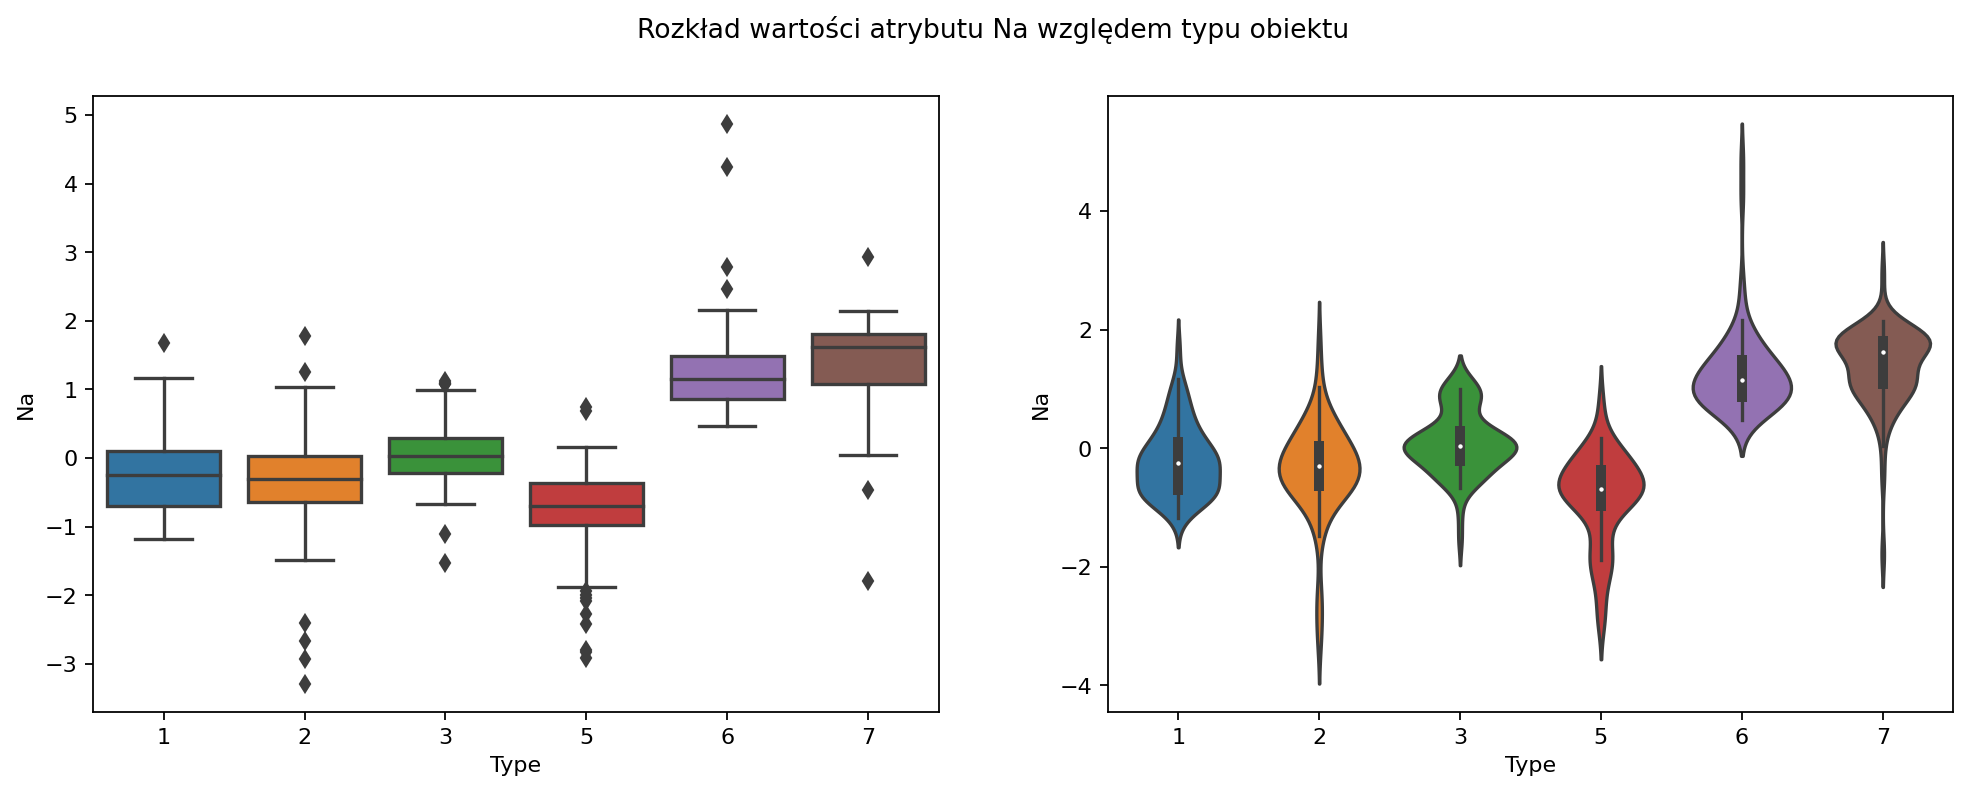

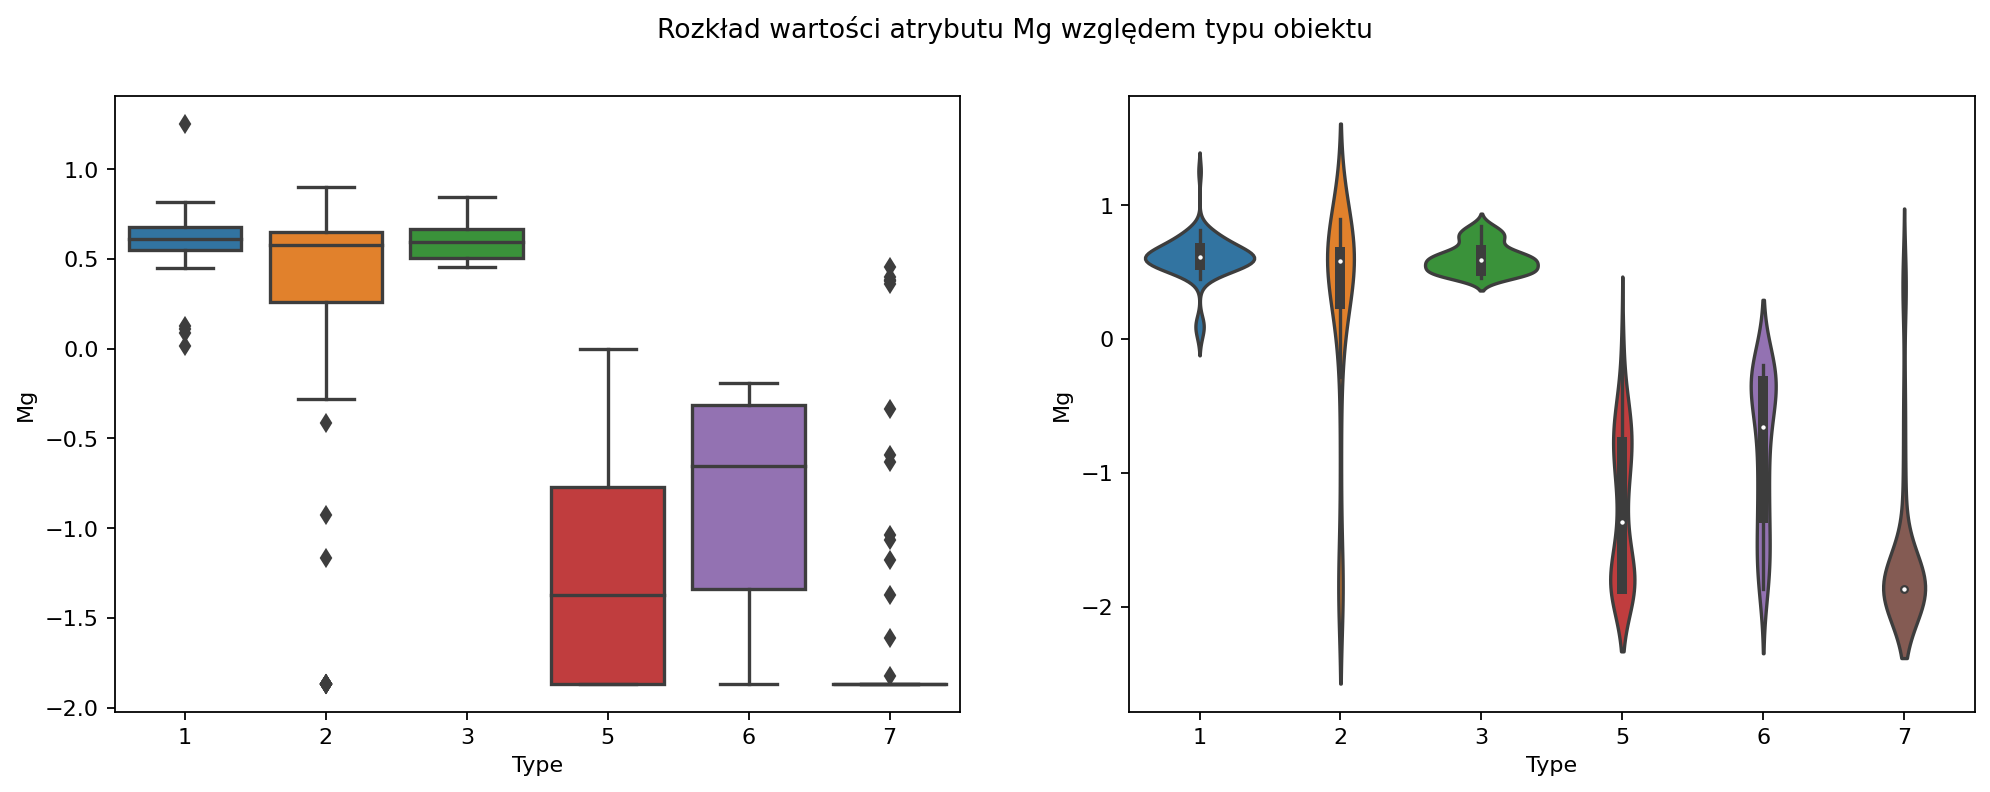

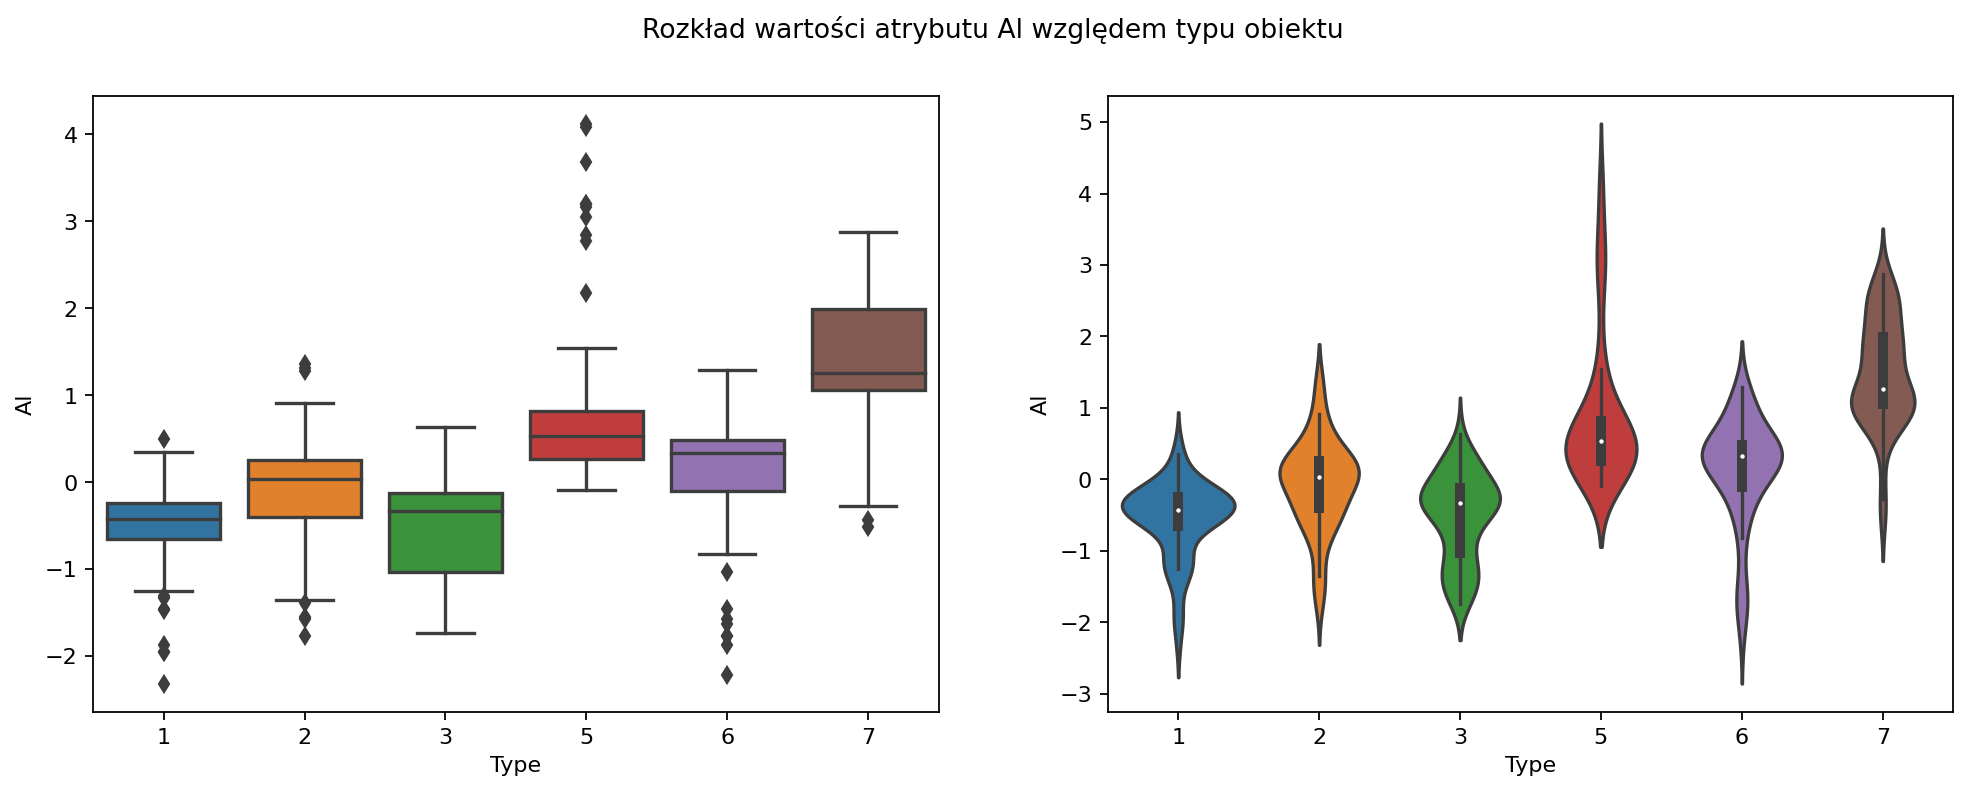

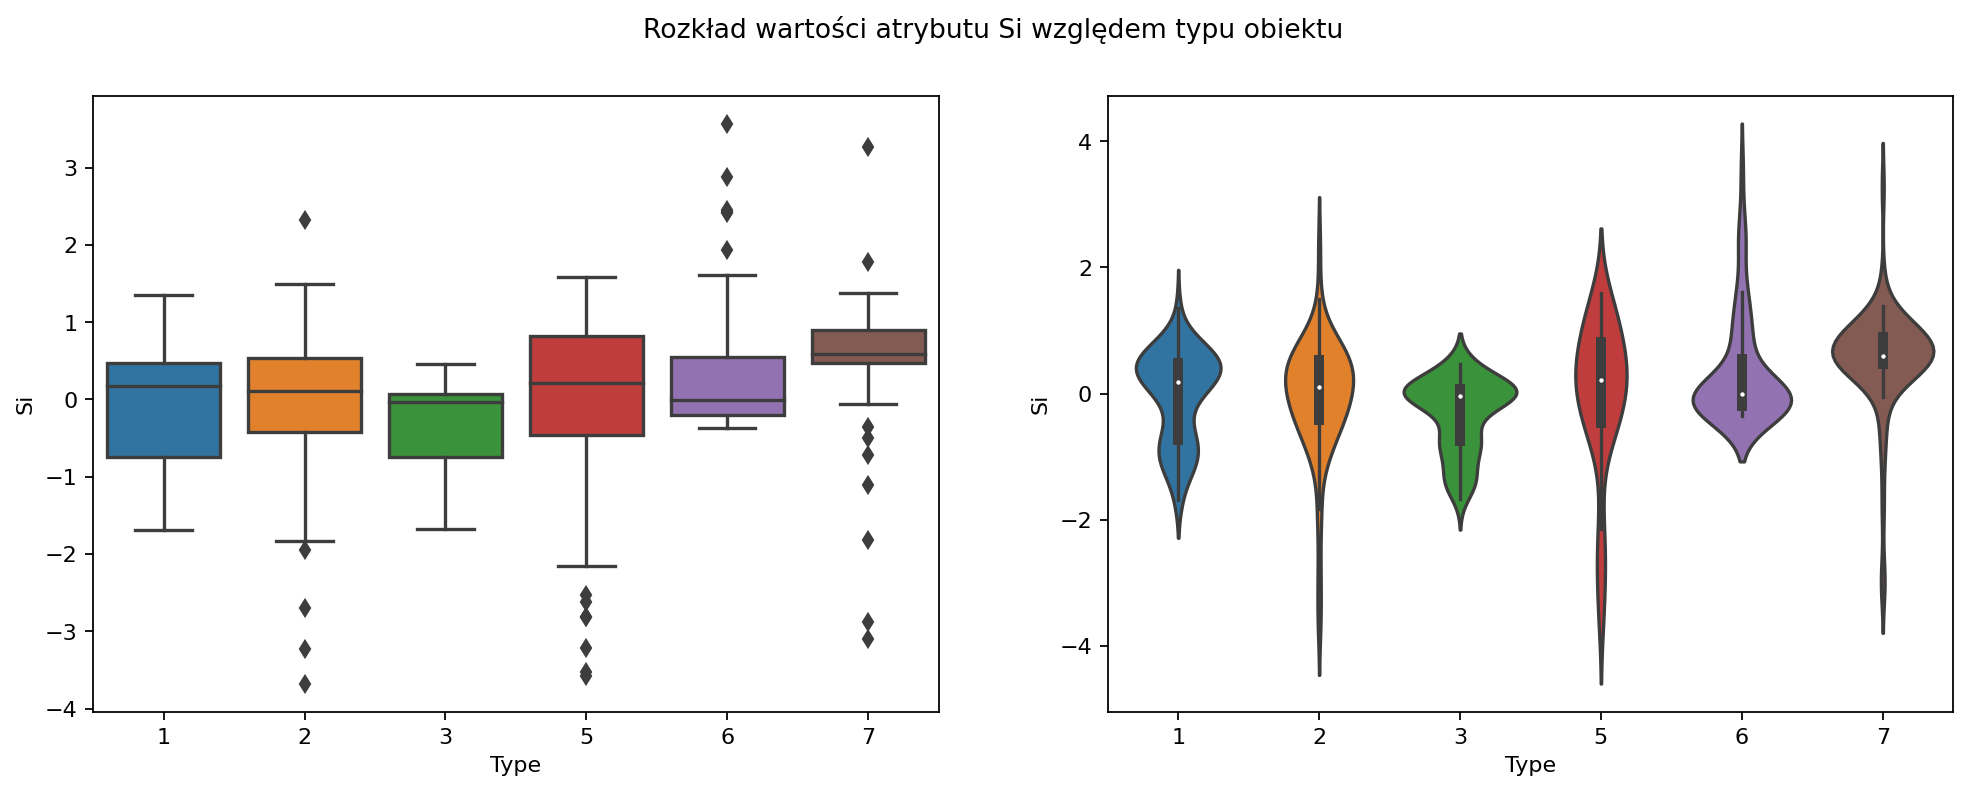

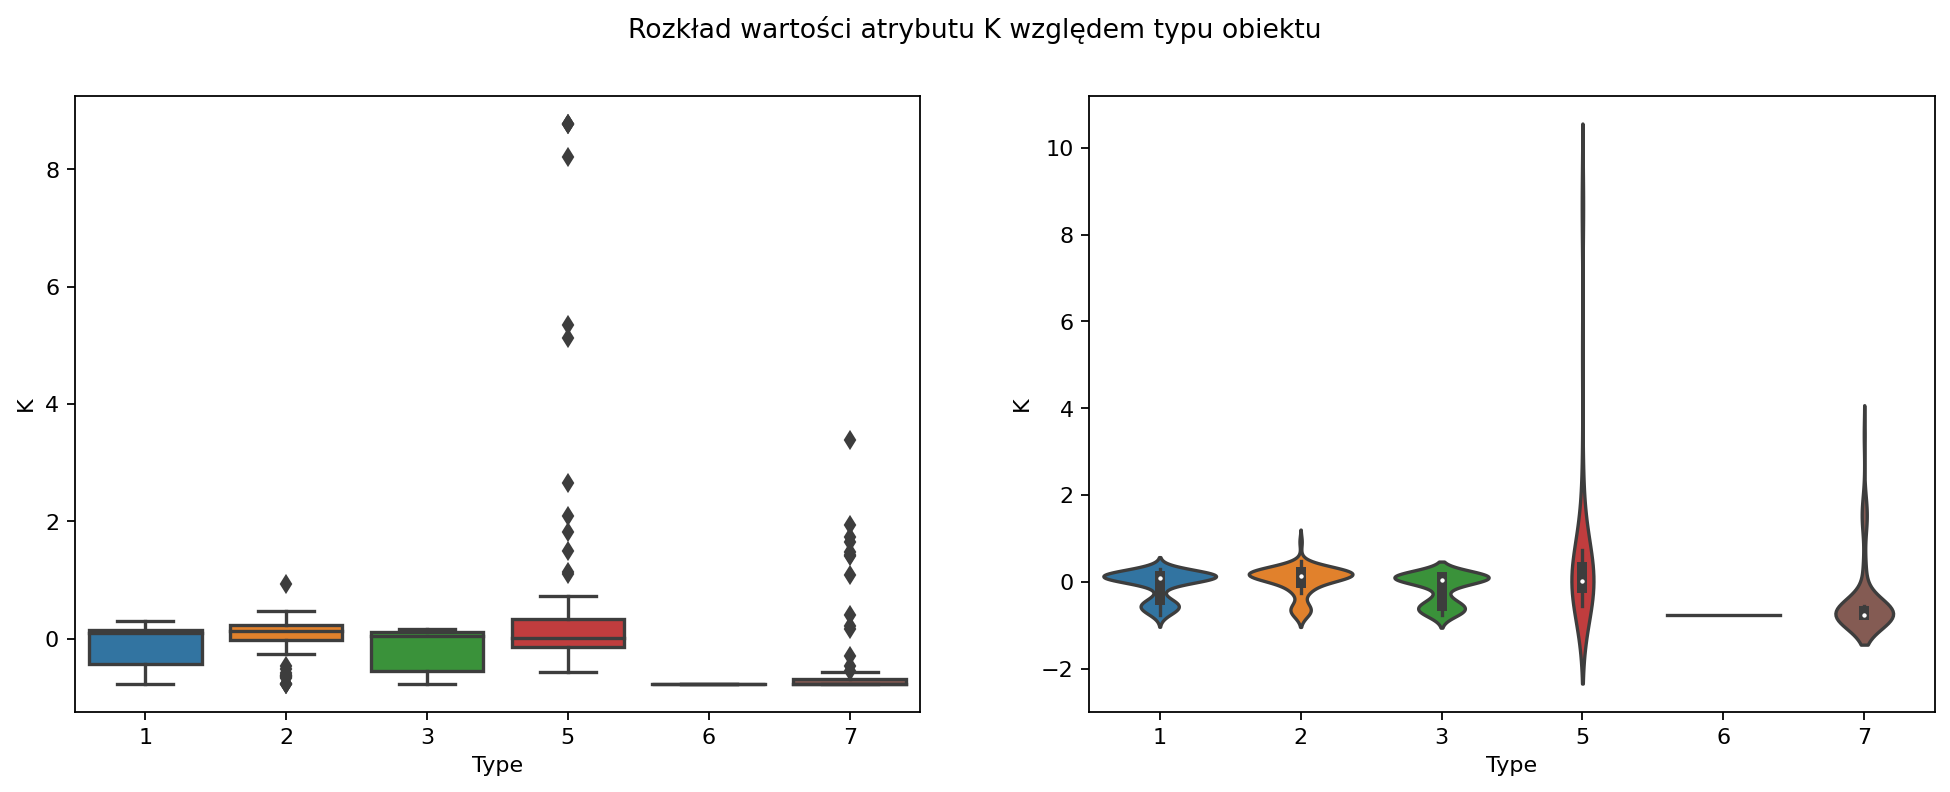

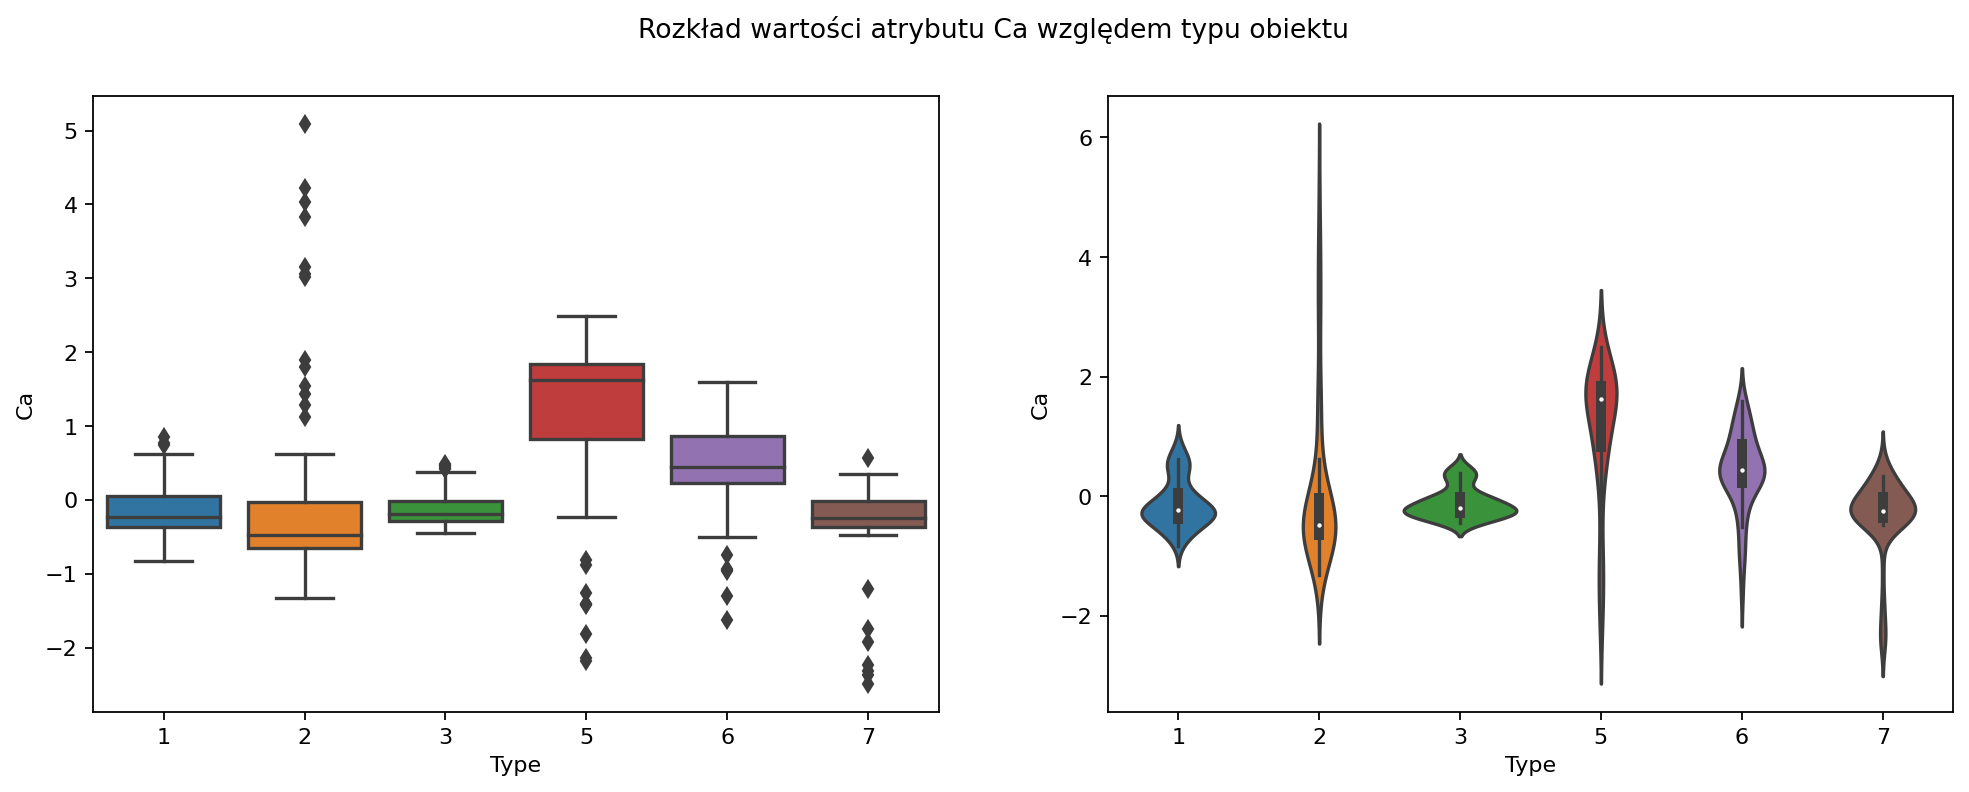

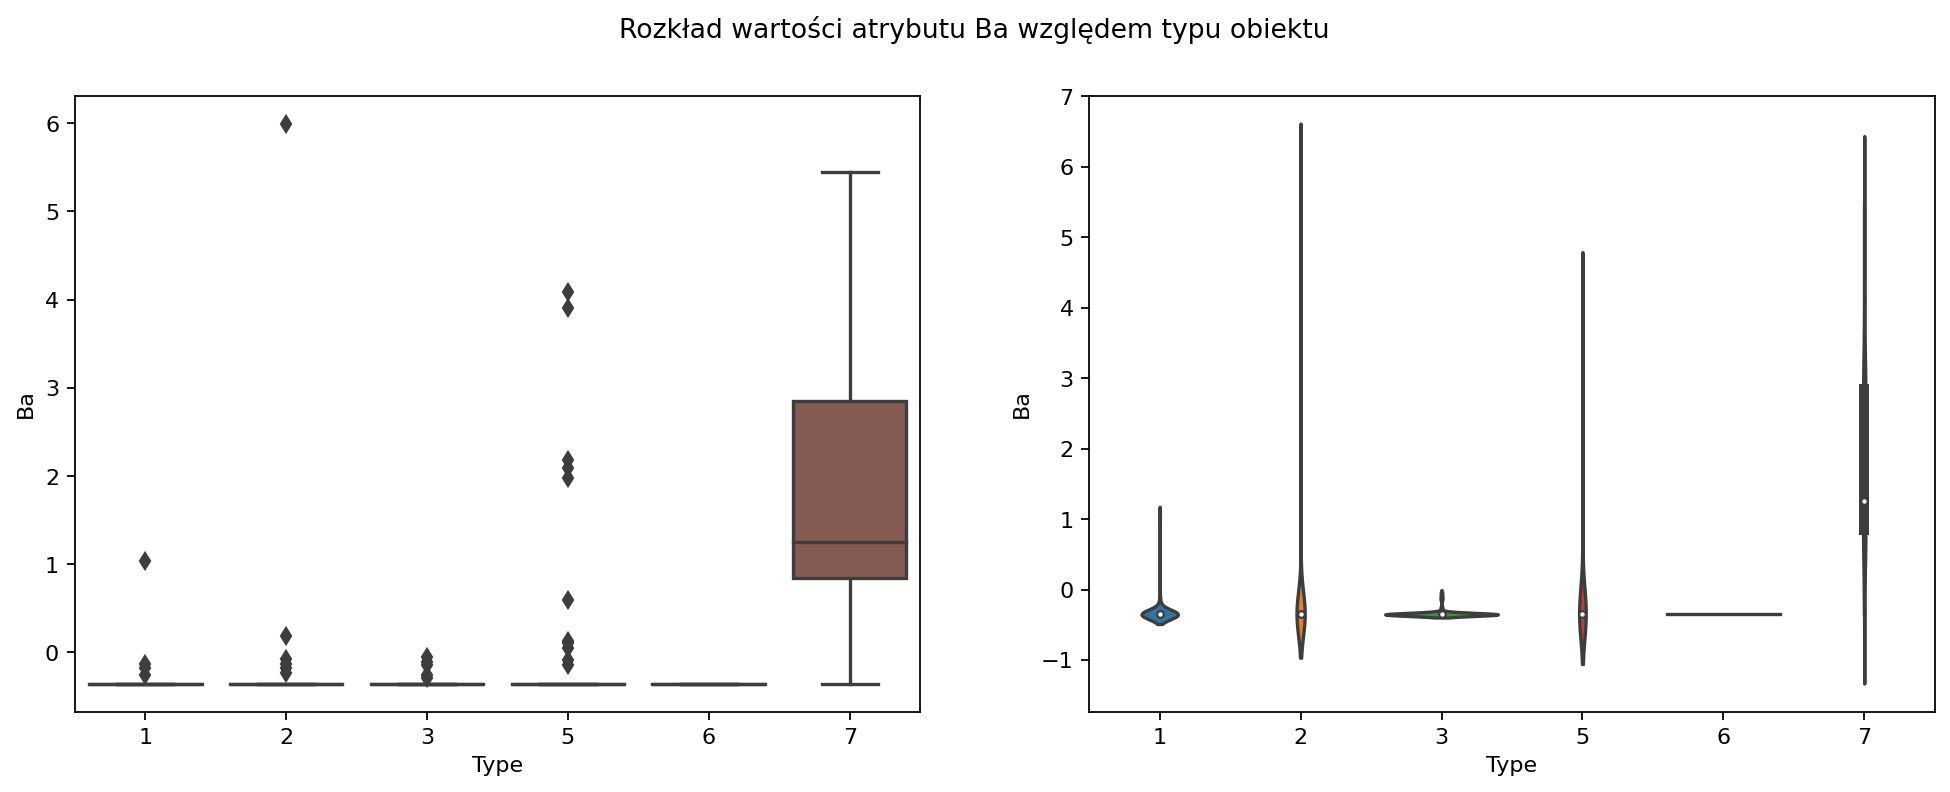

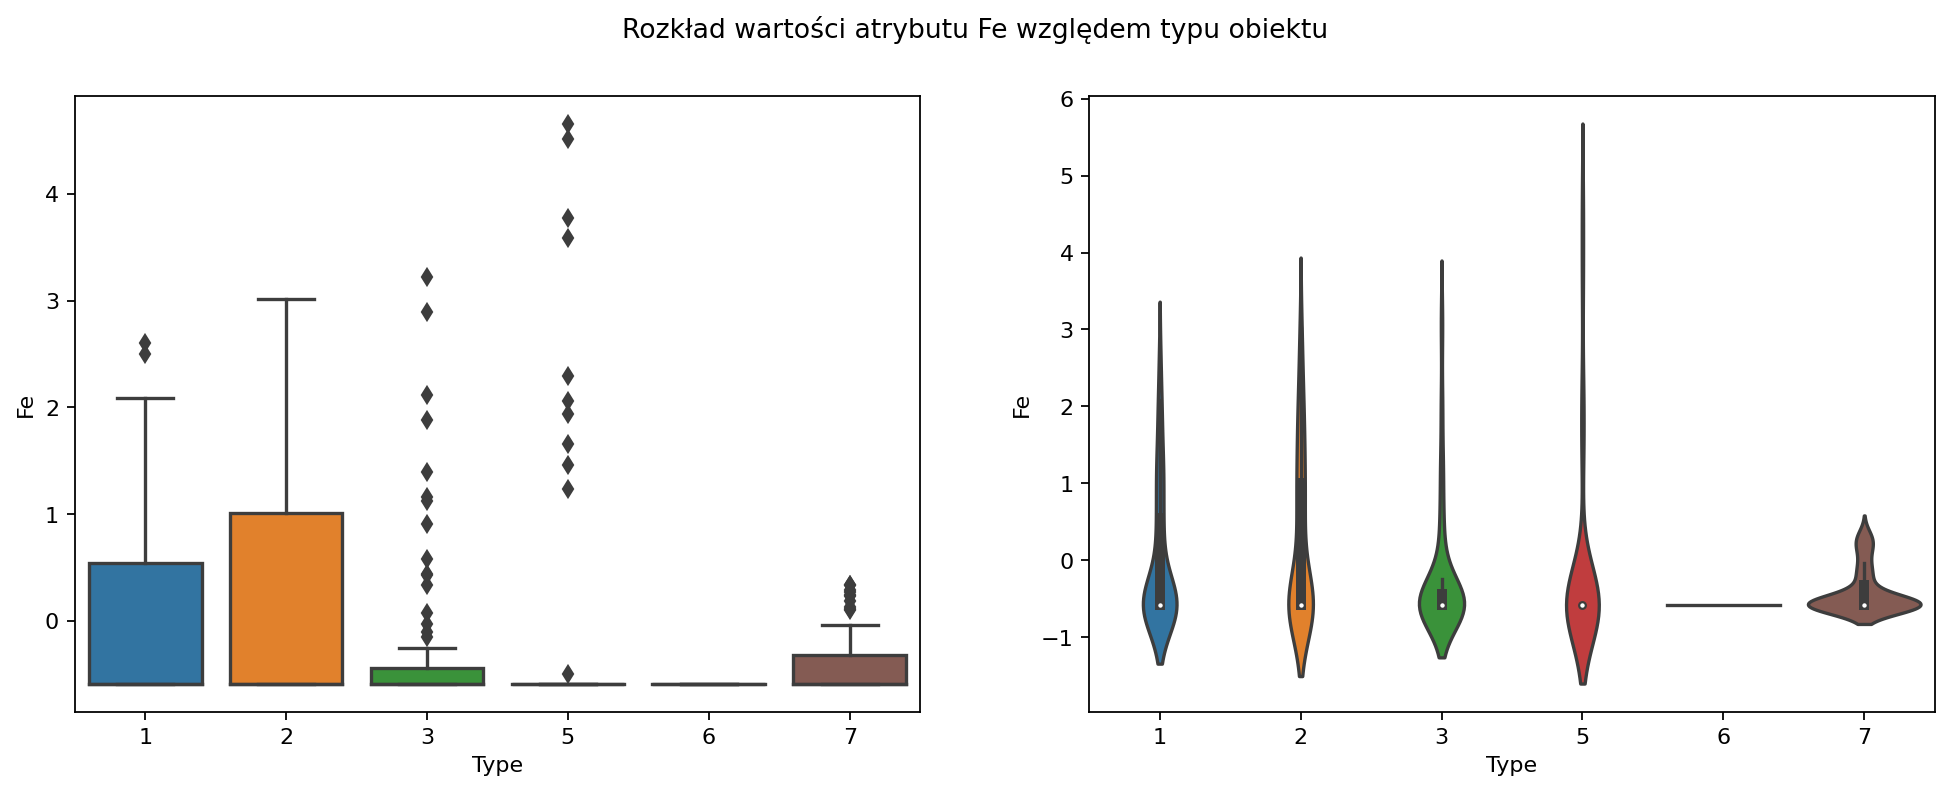

In [20]:
for atr in data.columns[:-1]:
    plt.figure(figsize=(15,5), dpi=160)
    plt.suptitle(f"Rozkład wartości atrybutu {atr} względem typu obiektu")
    plt.subplot(1,2,1)
    sns.boxplot(data=data, x="Type", y=atr)
    plt.subplot(1,2,2)
    sns.violinplot(data=data, x="Type", y=atr)

Z powyższych wykresów możemy wyciągnąć następujące wnioski:

- dla atrybutu `Na`, rozkłady dla klas 6 i 7 odstają od pozostałych klas
- dla atrybutu `Mg`, rozkłady dla klas 5, 6 i 7 znacząco odstają od pozostałych klas
- dla atrybutu `Ba`, wyłącznie (poza pojedynczymi przypadkami z innych klas) obiekty z klasy 7 przyjmują wartości z szerokiego zakresu
- dla atrybutu `Fe`, głównie obiekty z klas 1,2 i 3 przyjmują wartości z szerokiego zakresu

Pozostałe atrybuty wyróżniają się w mniejszym stopniu przez co mogą okazać się mniej przydatne podczas klasyfikacji.

<Figure size 640x480 with 0 Axes>

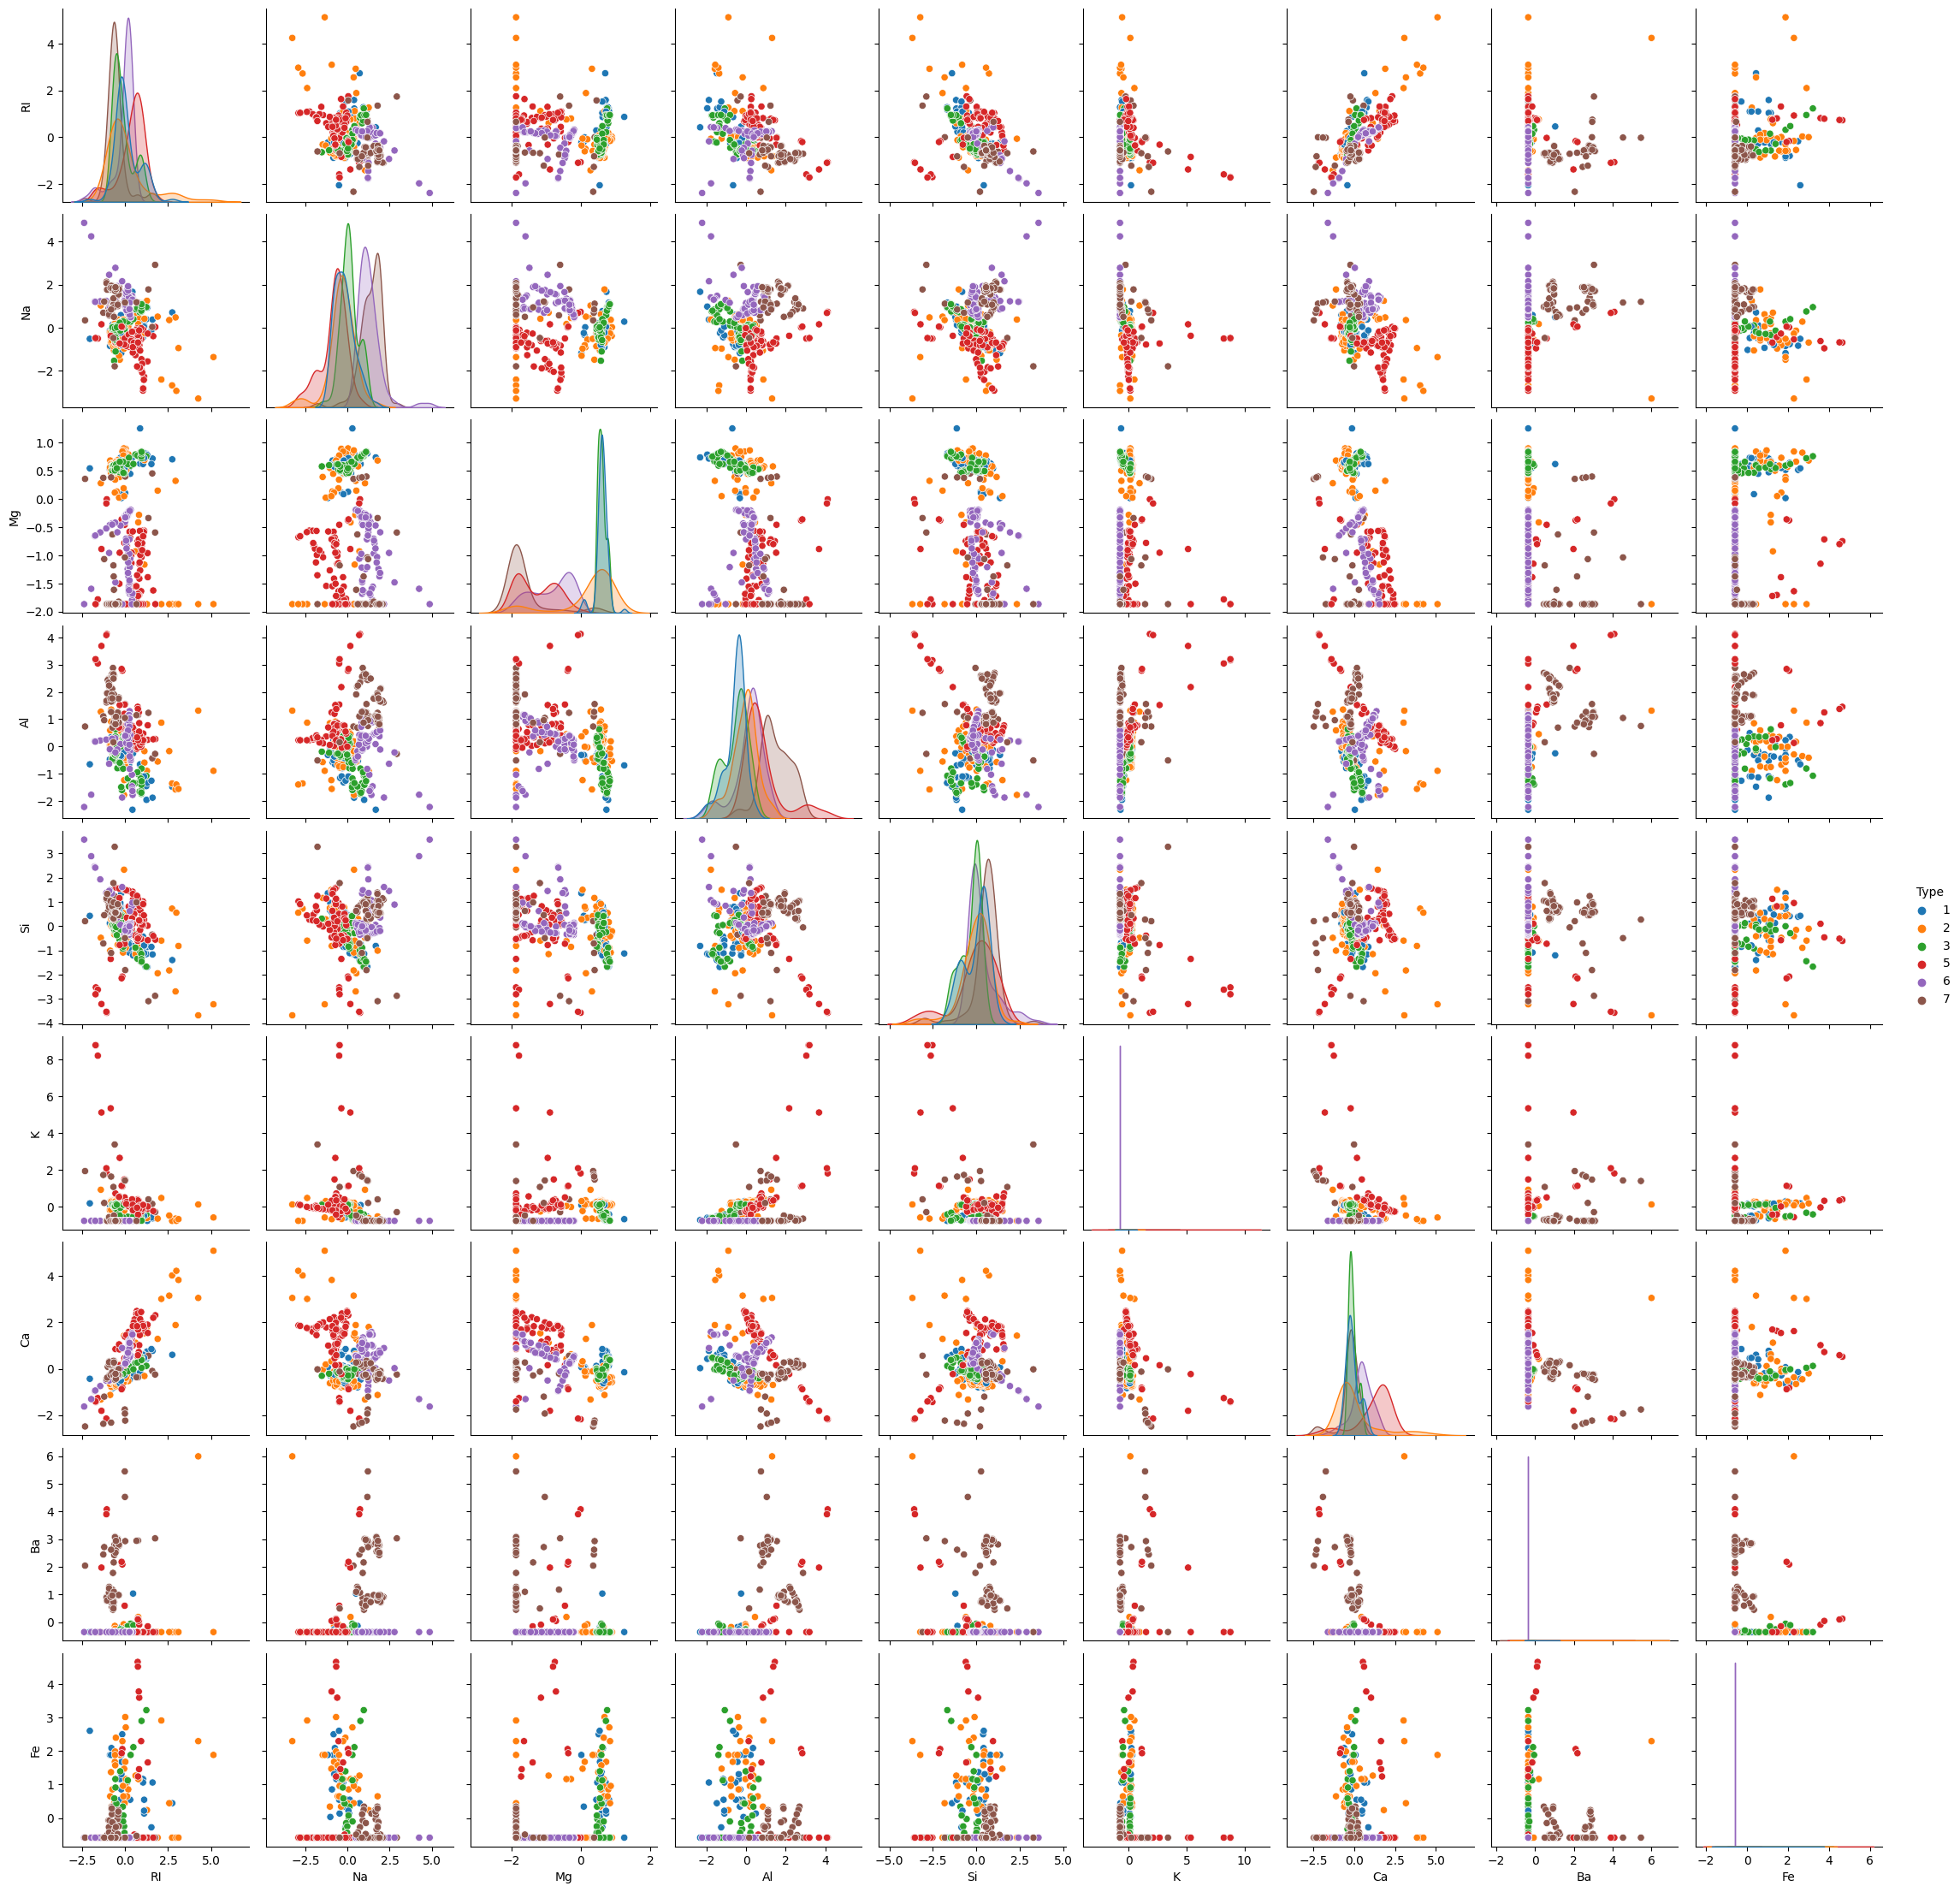

In [21]:
plt.figure()
sns.pairplot(data, kind="scatter", hue="Type")

Analizując macierz wykresów punktowych atrybutów, można dojść do wniosku, że klasy nie zostały wydzielone wyłącznie na podstawie dwóch atrybutów, ponieważ na żadnym wykresie nie ma oddzielonego od pozostałych obiektów skupiska punktów należących do jednej klasy.

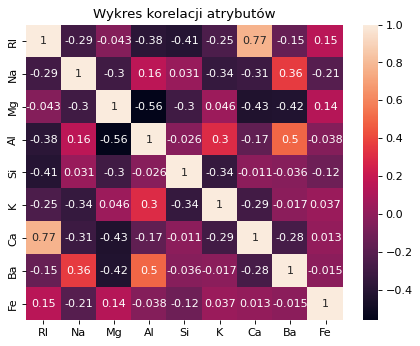

In [22]:
plt.figure(dpi=80)
plt.title("Wykres korelacji atrybutów")
sns.heatmap(data.corr(), annot=data.corr())

Warta odnotowania jest tylko korelacja atrybutów `RI` i `Ca`, wynosząca 0.76. Oznacza to, że te 2 atrybuty są ze sobą istotnie skorelowane dodatnio i wybór obu z nich do klasyfikacji może okazać się niepotrzebny.

## 3. Rozwiązanie problemu

Po wstępnej obróbce danych możemy przystąpić do rozwiązania problemu klasyfikacji. Przeanalizujemy wyniki i uczenia dla różnych klasyfikatorów i na tej podstawie dobierzemy klasyfikator najlepszy dla naszych danych. 

### 3.1 Przygotowanie narzędzi

Przygotujmy funkcję, która podzieli dane na zbiór uczący i testowy według podanej proporcji, a jako wynik zwróci słownik zawierącjy macierz atrybutów opisujących oraz wektor wartości atrybutów decyzyjnych, odpowiednio dla zbioru uczącego i testowego. Zakładamy, że atrybut opisujący jest zawsze ostatnią kolumną podanej ramki.

In [23]:
# dzieli macierz (ramkę) danych na zbiór uczacy i testowy
# df - ramka danych; ratio - proporcja podzialu (0-1)
# uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)

def split(df, ratio):
    des_train, des_test, dec_train, dec_test = train_test_split(
        df.iloc[:, 0:-1], df.iloc[:, -1].astype("category").cat.codes, test_size=ratio
    )
    return {
        "des_train": des_train,
        "des_test": des_test,
        "dec_train": dec_train,
        "dec_test": dec_test,
    }

# zwraca słownik z kluczami:
# des_train/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
# dec_train/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego

Przygotujmy również funkcję, która ułatwi nam testowanie kolejnych klasyfikatorów. Funkcja jak argumenty przyjmuje model kasyfikatora, dane podzielone przy pomocy funkcji split oraz listę atrybutów do uwzględnienia przy klasyfikacji w postaci numerów kolumn. Funkcja najpierw trenuje model, a następnie wyświetla macierze pomyłek dla zbioru uczącego i testowego wraz z obliczoną dokładnością.

In [24]:
# wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek dla zbioru uczącego i testowego
# model - model klasyfikatora
# title - nazwa modelu do wyświetlenia
# splitted - dane (słownik zwracany przez funkcje split)
# attr - lista atrybutów uwzględnianych w weryfikacji

def verify(model, title, splitted, attr):
    model.fit(splitted["des_train"].iloc[:, attr], splitted["dec_train"])
    result_train = model.predict(splitted["des_train"].iloc[:, attr])
    result_test = model.predict(splitted["des_test"].iloc[:, attr])
    # wyświetlenie macierzy pomyłek i dokładności dla zbioru uczącego
    plt.figure(figsize=(10, 4))
    plt.suptitle(title)
    cm_train = confusion_matrix(splitted["dec_train"], result_train)
    accuracy_train = np.sum(np.diag(cm_train)) / np.sum(cm_train)
    print("macierz pomyłek - zbiór uczący, dokładność:", accuracy_train)
    plt.subplot(1, 2, 1)
    plt.title("macierz pomyłek - zbiór uczący", fontsize=10)
    sns.heatmap(cm_train, annot=True)
    # wyświetlenie macierzy pomyłek i dokładności dla zbioru testowego
    cm_test = confusion_matrix(splitted["dec_test"], result_test)
    accuracy_test = np.sum(np.diag(cm_test)) / np.sum(cm_test)
    print("macierz pomyłek - zbiór testowy, dokładność:", accuracy_test)
    plt.subplot(1, 2, 2)
    plt.title("macierz pomyłek - zbiór testowy", fontsize=10)
    sns.heatmap(cm_test, annot=True)
    plt.show()
    return (accuracy_train, accuracy_test)

# zwraca krotkę z obliczonymi dokładnościami odpowiednio dla zbioru uczącego i testowego

Zacznijmy od podzielenia danych na zbióru uczący i testowy przy użyciu przygotowanej wcześniej funkcji. Jako współczynnik proporcji przyjmijmy 0.3 jako iż jest to najczęściej stosowany współczynnik przy podziale zbioru.

In [25]:
ratio = 0.3
splitted = split(data, ratio)
print("Liczba obiektów zbioru uczącego: ", len(splitted["des_train"]))
print("Liczba obiektów zbioru testowego: ", len(splitted["des_test"]))

Liczba obiektów zbioru uczącego:  319
Liczba obiektów zbioru testowego:  137


Stwórzmy ramkę, w której będziemy przechowywać wyniki dla poszczególnych klasyfikatorów w celu ich późniejszego porównania. Wybierzmy również kolumny, z których chcemy korzystać podczas klasyfikacji. Na podstawie wniosków ze wstępnego przygotowania danych wybieramy wszystkie dostępne cechy.

In [26]:
results = pd.DataFrame(columns=["Model", "Train", "Test"])
columns = range(0, 9)

### 3.2 Testowanie klasyfikatorów

Po przygotowaniu odpowiednich narzędzi możemy przystąpić do testowania klasyfikatorów. 

Będziemy testować następujące metody klasyfikacji:
- metoda najbliższego sąsiada
- metoda k-najbliższych sąsiadów (3,5,9)
- metoda najbliższego prototypu
- naiwny klasyfikator Bayesa
- drzewa decyzyjne

#### Metoda najbliższego sąsiada

macierz pomyłek - zbiór uczący, dokładność: 1.0
macierz pomyłek - zbiór testowy, dokładność: 0.8832116788321168


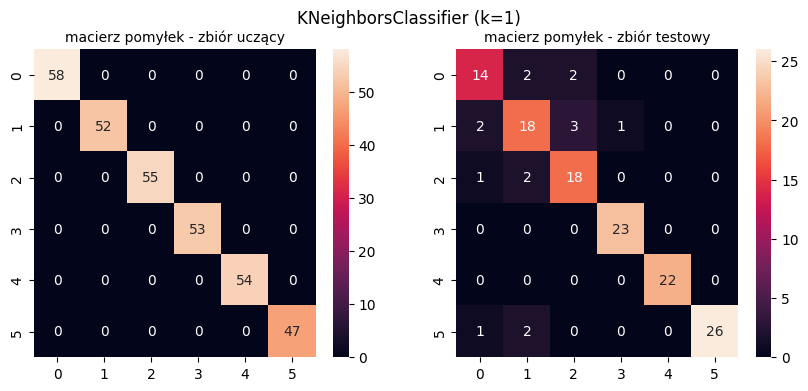

In [27]:
# zdefiniowanie modelu klasyfikatora
k = 1
model = KNeighborsClassifier(n_neighbors=k)
name = type(model).__name__ + " (k=" + str(k) + ")"

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Mimo prostoty klasyfikatora 1-NN, otrzymane wyniki są bardzo dobre, dla zbioru testowego uzyskaliśmy poprawność na poziomie około 90%, a dla zbioru uczącego 100%, co oczywiście wynika z zasady działania algorytmu.

#### Metoda k-najbliższych sąsiadów (k=3)

macierz pomyłek - zbiór uczący, dokładność: 0.9153605015673981
macierz pomyłek - zbiór testowy, dokładność: 0.8102189781021898


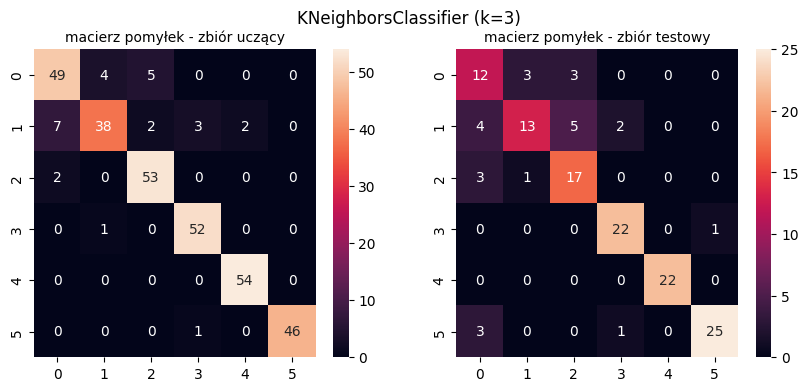

In [28]:
# zdefiniowanie modelu klasyfikatora
k = 3
model = KNeighborsClassifier(n_neighbors=k)
name = type(model).__name__ + " (k=" + str(k) + ")"

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Zwiększając liczbę k, utworzyliśmy bardziej zgeneralizowany model, natomiast z mniejszą dokładnością.

#### Metoda k-najbliższych sąsiadów (k=5)

macierz pomyłek - zbiór uczący, dokładność: 0.8746081504702194
macierz pomyłek - zbiór testowy, dokładność: 0.7956204379562044


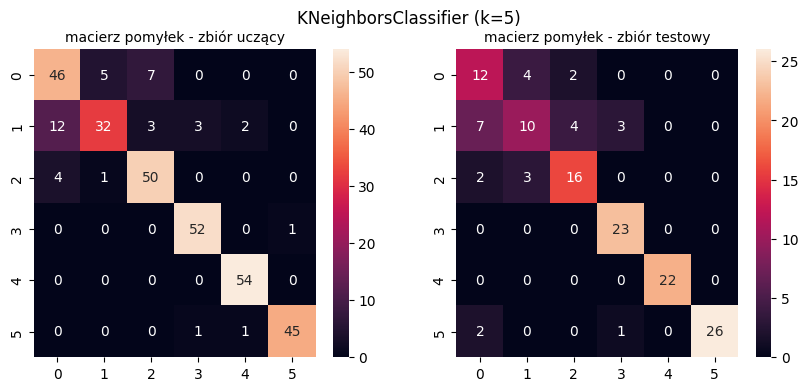

In [29]:
# zdefiniowanie modelu klasyfikatora
k = 5
model = KNeighborsClassifier(n_neighbors=k)
name = type(model).__name__ + " (k=" + str(k) + ")"

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Dla 5-NN otrzymujemy wynik porównywalny z 3-NN.

#### Metoda k-najbliższych sąsiadów (k=9)

In [2]:
# zdefiniowanie modelu klasyfikatora
k = 9
model = KNeighborsClassifier(n_neighbors=k)
name = type(model).__name__ + " (k=" + str(k) + ")"

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

NameError: name 'KNeighborsClassifier' is not defined

Dla 9-NN analogiczny przypadek do 5-NN.

#### Metoda najbliższego prototypu

macierz pomyłek - zbiór uczący, dokładność: 0.7335423197492164
macierz pomyłek - zbiór testowy, dokładność: 0.7153284671532847


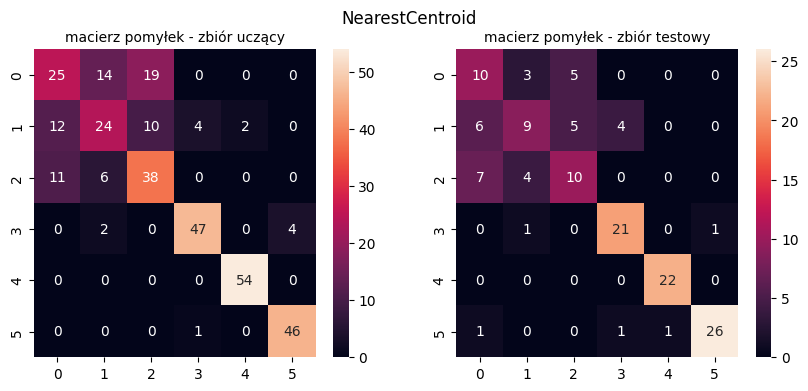

In [31]:
# zdefiniowanie modelu klasyfikatora
model = NearestCentroid()
name = type(model).__name__

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Przy klasyfikatorze najbliższego prototypu nie spodziewaliśmy się wyników lepszych od metody najbliższych sąsiadów, co potwierdziło się z rzeczywistością, ponieważ siła tego klasyfikatora leży w oszczędności pamięci.

#### Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.7178683385579937
macierz pomyłek - zbiór testowy, dokładność: 0.6934306569343066


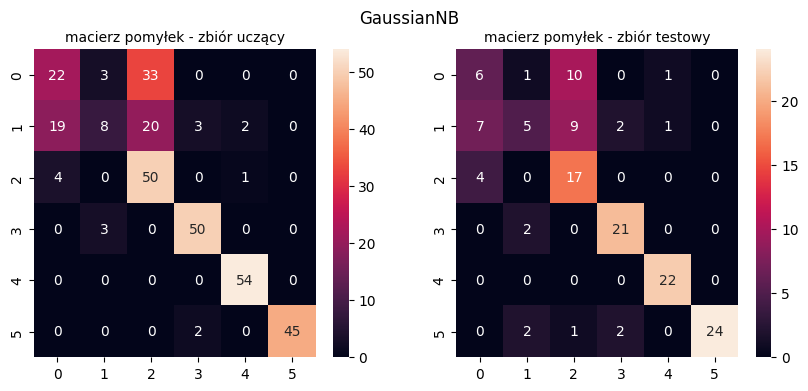

In [32]:
# zdefiniowanie modelu klasyfikatora
model = GaussianNB()
name = type(model).__name__

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Dokładność klasyfikatora Bayesa plasuje się poniżej tej najbliższego sąsiada, lecz wciąż jest to wynik dostateczny


#### Drzewo decyzyjne o domyślnej głębokości

macierz pomyłek - zbiór uczący, dokładność: 1.0
macierz pomyłek - zbiór testowy, dokładność: 0.8759124087591241


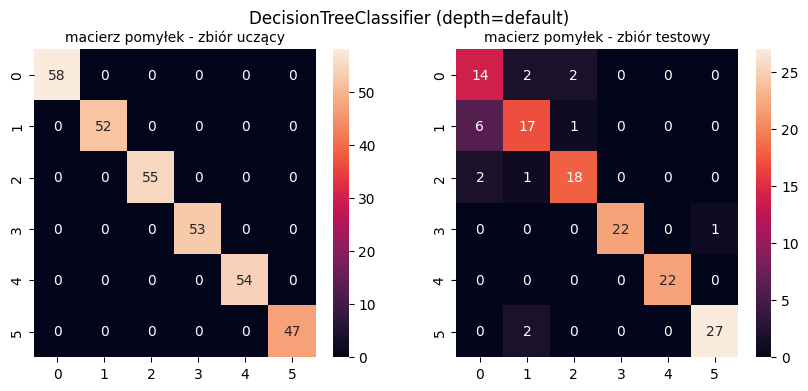

In [33]:
# zdefiniowanie modelu klasyfikatora
model = DecisionTreeClassifier()
name = type(model).__name__ + " (depth=default)"

# obliczenie dokładności i wyświetlenie macierzy pomyłek dla zbiorów uczącego i testowego
accuracy = verify(model, name, splitted, columns)

# dodanie wyników do ramki z wynikami
results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

#### Drzewa decyzyjne o różnych głębokościach
Drzewa decyzyjne o różnych głębokościach

macierz pomyłek - zbiór uczący, dokładność: 0.3510971786833856
macierz pomyłek - zbiór testowy, dokładność: 0.291970802919708


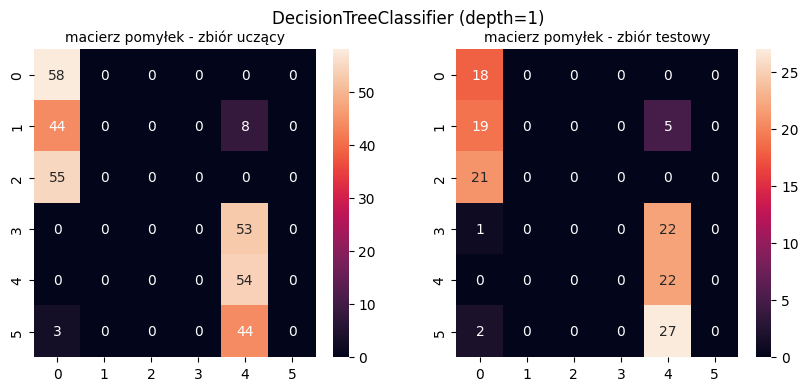

macierz pomyłek - zbiór uczący, dokładność: 0.8150470219435737
macierz pomyłek - zbiór testowy, dokładność: 0.7591240875912408


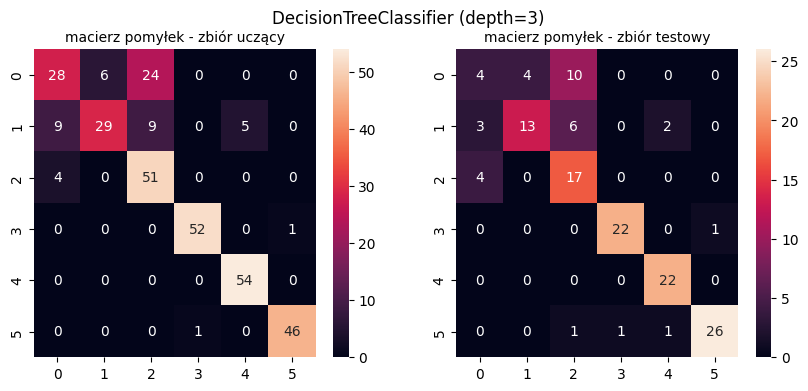

macierz pomyłek - zbiór uczący, dokładność: 0.9090909090909091
macierz pomyłek - zbiór testowy, dokładność: 0.7883211678832117


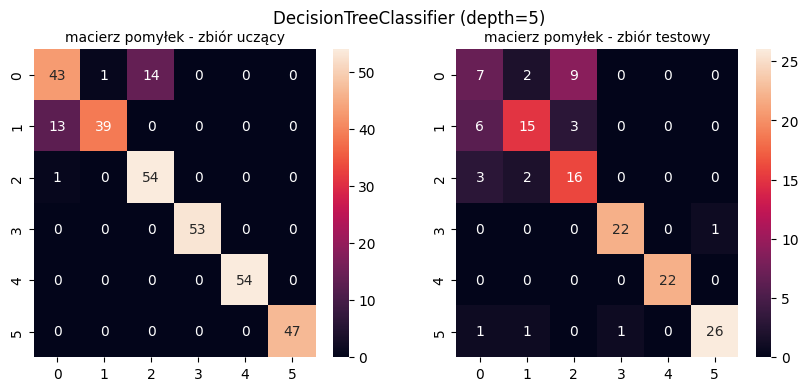

macierz pomyłek - zbiór uczący, dokładność: 1.0
macierz pomyłek - zbiór testowy, dokładność: 0.8832116788321168


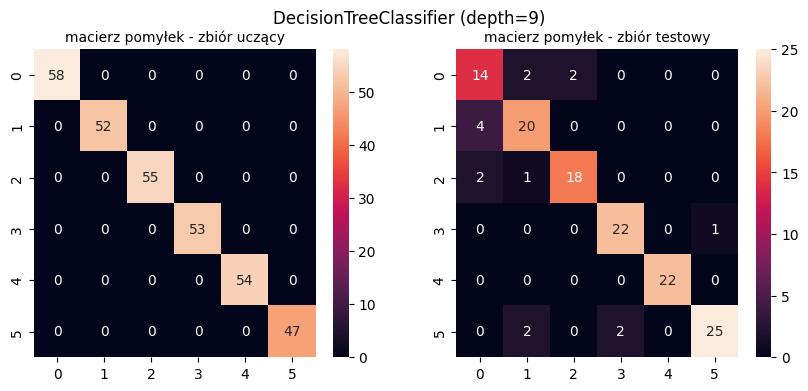

In [34]:
for depth in (1, 3, 5, 9):
    model = DecisionTreeClassifier(max_depth = depth)
    name = type(model).__name__ + " (depth=" + str(depth) + ")"
    accuracy = verify(model, name, splitted, columns)
    results.loc[len(results.index)] = [name, accuracy[0], accuracy[1]]

Używając jednostopniowej głębokości drzewa, wyniki klasyfikacji okazały się mało dokładne. Inaczej wygląda to dla głębszych drzew - wraz ze wzrostem głębokości wzrasta też poprawność dla zbioru testowego, a poprawność dla zbioru uczącego zbliża się do 100%. Nie zawsze jest to dobry znak, gdyż świadczy on o utracie zdolności generalizacji przez klasyfikator.

### 3.3 Przedstawienie wyników

In [35]:
results

,Model,Train,Test
0,KNeighborsClassifier (k=1),1.00,0.88
1,KNeighborsClassifier (k=3),0.92,0.81
2,KNeighborsClassifier (k=5),0.87,0.80
3,KNeighborsClassifier (k=9),0.84,0.79
4,NearestCentroid,0.73,0.72
5,GaussianNB,0.72,0.69
6,DecisionTreeClassifier (depth=default),1.00,0.88
7,DecisionTreeClassifier (depth=1),0.35,0.29
8,DecisionTreeClassifier (depth=3),0.82,0.76
9,DecisionTreeClassifier (depth=5),0.91,0.79


## 4. Wnioski i obserwacje

### 4.1 Etap analizy eksploracyjnej

Pierwszym naszym spostrzeżeniem była względnia nieduża liczba obiektów w naszym zbiorze danych. Przy 7 różnych klasach do rozpoznania, 214 obiektów daje średnio 30 obiektów na klasę. Z tego względu nie spodziewaliśmy się dużej skuteczności klasyfikatorów w rozpoznawaniu klas - tj. powyżej 95%.
<br>Mieliśmy do dyspozycji 10 różnych atrybutów. 9 z nich było opisowych - były to procentowe udziały masy danego pierwiastka w całościowej masie tlenku oraz współczynnik załamania światła przechodzącego przez dane szkło. Ostatnim atrybutem był atrybut decyzycji mówiący o typie szkła. Zdefiniowanych rodzajów było 7, lecz tylko 6 występowało w naszym zbiorze danych. Były to szkła używane takich celów jak: okna konstrukcyjne, szyby samochodowe, pojemniki, zastawa stołowa oraz reflektory. Typy danych używane przez atrybuty opisowe nie były zróżnicowane (tj. binarne, całkowitoliczbowe, tekstowe), ponieważ wszystkie były liczbami zmiennoprzecinkowymi float64. Atrybut decyzyjny natomiast, początkowo był integerem, lecz zmieniliśmy to na typ 'category' w celu odróżnienia go od opisowych.
<br> Zakres wartości atrybutów opisowych był różny. Przykładowo, zakres dla sodu był 69.8 - 75.1, gdy dla współczynnika załamania wartości mieściły się w 1.51 - 1.53. W celu ujednolicenia zakresów tych wartości, co ułatwiło późniejszą ich analizę, wykonaliśmy standaryzację z użyciem klasy *StandardScaler* z pakietu *sklearn*. 
<br> Kolejnym problemem który napotkaliśmy było nierównomierna dystrybucja obiektów wśród klas. Przeważającą część stanowiły obiekty klas 1. i 2., gdy najrzadsza klasa miała jedynie 9 obiektów. Aby klasyfikatory nie faworyzowały żadnej z klas, zastosowaliśmy procedurę tzw. *oversamplingu*. Wykorzystaliśmy do tego metodę *SMOTE* z pakietu *imblearn*.
<br> Analizująć wykresy skrzypcowe doszliśmy do wniosku, że częstym zjawiskiem jest występowanie w obrębie klas, obiektów, których część atrybutów znacząco odstaje od wartości średniej. Ich występowanie było na tyle powszechne, że nie potraktowaliśmy ich jako błędne obserwacje które należałoby wyeliminować.
<br>Z macierzy wykresów punktowych dało się zauważyć, że największą przydatność w rozdzielaniu na klasy może mieć magnez, bar i żelazo. Także, żaden z atrybutów nie wydawał się być zbędny, lub wprowadzający w błąd. Dalej, spostrzegliśmy że żaden z wykresów punktowych nie wydziela klas na satysfakcjonującym poziomie, używając jedynie dwóch zmiennych. Dlatego po naradzeniu się, podjęliśmy decyzję o użyciu wszystkich 9 atrybutów opisujących w procesie klasyfikacji. Byliśmy też świadomi istotnej korelacji wapnia z współczynnikiem załamania.




### 4.2 Etap klasyfikacji


Zaczęliśmy od najprostszego nam znanego modelu klasyfikacji, czyli klasyfikatora najbliższego sąsiada. Dane, wśród których po oversamplingu było już 456 obiektów, podzieliliśmy w proporcji 70:30 na zbiory uczący i testowy. Wynik klasyfikacji 1-NN okazał się zaskakująco dobry, z dokładnością na poziomie ~90% dla zbioru testującego. Dla zbioru uczącego było to 100%, co jest rezultatem sposobu w jaki algorytm działa.
<br> Zwiększając liczbę najbliższych sąsiadów do odpowiednio 3, 5 i 9, zauważyliśmy spadek skuteczności klasyfikacji do okolic 80%. Mogło to być spowodowane charakterystyką naszego zbioru danych, gdzie wszystkie klasy obejmowały szerokie zakresy wartości oraz jak wspomniane wyżej - powszechnością obiektów odstających od normy dla danej klasy. Dokładność w przypadku klasyfikacji zbioru uczącego malała, co było związane z rosnącą zdolnością generalizacji.
<br> Klasyfikator najbliższego prototypu sprowadza obiekty danej klasy do pojedynczego punktu, będącego reprezentantem całego zbioru. Metoda ta okazuje się przydatna w przypadku ogromnej ilości danych - pozwala na zaoszczędzenie miejsca w pamięci. W naszej sytuacji, przy niewielkiej liczbie obiektów i klasach które nie są widocznie wyodrębnione, użycie klasyfikatora najbliższego prototypu mija się z celem. Mimo wszystko, dokładność klasyfikacji jest na dostatecznym poziomie około 70%, dla zbioru uczącego jak i testowego.
<br> Dla naiwnego klasyfikatora Bayesa, wykorzystującego prawdopodobieństwa warunkowe, wynik klasyfikacji okazał się zbliżony do tego dla najbliższego prototypu. Najwięcej pomyłek było w obrębie klas 1. i 2. - były one najtrudniejsze do rozpoznania dla modelu Bayesa, jak i najbliższego prototypu.
<br> Na koniec przeszliśmy do drzew decyzyjnych. Gdy uruchomiliśmy algorytm dla głębokości drzewa równej 1, zauważyliśmy że jest to zbyt mało aby skutecznie oszacowywać klasy. Spodziewaliśmy się tego, z uwagi na wcześniej wspomnianą specyfikę naszego zbioru danych. Dopiero przy głębokości 3 i więcej, wyniki były zadowalające. Szczyt dokładności przypadł na głębokość równą 9, jednocześnie był to model cechujący się najniższą zdolnością generalizacji.
<br> W rezultacie analizy klasyfikatorów, na przedzie, jeżeli chodzi o najwyższą nieomylność w przyporządkowywaniu obiektów do klas, znajdują się metody 1-NN oraz drzewo decyzyjne (d=9). Dlatego też, w przypadku realnej potrzeby klasyfikacji typów szkła, skłanialibyśmy się właśnie ku tym dwóm modelom.


### 4.3 Podsumowanie

Praca nad owym projektem pozwoliła nam w praktycznym zastosowaniu użyć wiedzy i umiejętności które nabyliśmy podczas zajęć laboratoryjnych. Uzupełniliśmy też ewentualne braki w naszej wiedzy. Współpraca w zespole przebiegła sprawnie - początkowy etap robiliśmy wspólnie, aby później mogły się wyklarować określone zadania które przydzieliliśmy sobie nawzajem. Każdy członek zespołu przeglądał i akceptował (lub też nie) pracę pozostałych. W ten sposób każdy był na bieżąco z aktualnym postępem w projekcie. Projekt, mimo, że w naszej opinii nie był trudny, okazał się być dla nas ciekawym doświadczeniem.